# INTELIGENCIA ARTIFICIAL (1INF24\)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)



# <font color=blue>Preprocesamiento de datos: Caso de Estudio</font>

---

## Integración de Técnicas de Machine Learning para la Predicción y Análisis de la contaminación del Aire en Lima metropolitana

El presente trabajo aborda la problemática de la contaminación del aire en diversos distritos de Lima, Perú, donde la alta densidad vehicular, la actividad industrial y la quema de residuos contribuyen a altos niveles de partículas en suspensión y gases tóxicos. El objetivo principal fue desarrollar un modelo predictivo de la calidad del aire utilizando técnicas de machine learning como árboles de decisión, regresión y análisis de componentes principales (PCA) para obtener predicciones precisas y analizar las dinámicas entre contaminantes y factores meteorológicos. Se tienen la siguiente base de datos con información relevante para el proceso de análisis:

1.   <font color=blue>estaciones_filtradas.csv</font>: Tabla con informacion general de contamincación por estaciones ubicadas en distritos de interés.



## Diccionario de datos

**estaciones_filtradas.csv** tiene los siguientes campos:

*   ESTACION: Nombre de estación de monitoreo automático de la calidad del aire.
*   ANO: Año en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   MES: Mes en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   DIA: Día en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   HORA: Hora en el que se realiza la medición en la estación de monitoreo automático de la calidad del aire.
*   PM 10: Material Particulado menor a 10 micras (PM10).
*   PM 2.5: Material Particulado menor a 2.5 micras (PM2.5).
*   SO2: Dioxido de azufre (SO2).
*   NO2: Dioxido de nitrógeno (NO2).
*   O3: Ozono.
*   CO: Monoxido de carbono.

## Cargando datos

In [81]:
import pandas as pd
import numpy as np

# Importamos la información de la tabla Maestro Clientes.
df_contaminantes = pd.read_csv('estaciones_filtradas.csv', sep = ',')
print('Se leyo un dataset de dimensiones {}'.format(df_contaminantes.shape))
df_contaminantes.head()

Se leyo un dataset de dimensiones (98568, 11)


,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5


## Verificando los tipos de datos de las columnas y haciendo correcciones si necesario
Revisamos que los tipos de datos sean los esperados, sino los corregimos

In [82]:
df_contaminantes.dtypes

ESTACION     object
ANO           int64
MES           int64
DIA           int64
HORA          int64
PM 10       float64
PM 2.5      float64
SO2         float64
NO2         float64
O3          float64
CO          float64
dtype: object

## Lidiando con nulos y dropeando columnas que no sean de utilidad  

Buscamos los valores nulos. Los mostramos en porcentaje del total de información.

In [83]:
df_contaminantes.columns

Index(['ESTACION', 'ANO', 'MES', 'DIA', 'HORA', 'PM 10', 'PM 2.5', 'SO2',
       'NO2', 'O3', 'CO'],
      dtype='object')

In [84]:
# Muestrame valores que tengan un mismo mes ,ano y distrito

In [85]:
filtro = (df_contaminantes['ANO']==2019) & (df_contaminantes['MES']==2) & (df_contaminantes['ESTACION'] == "ATE")
df_filtrado = df_contaminantes[filtro]
print(df_filtrado)

      ESTACION   ANO  MES  DIA  HORA   PM 10  PM 2.5   SO2  NO2   O3      CO
18264      ATE  2019    2    1     0   40.61     NaN  14.7  NaN  5.6  2004.4
18265      ATE  2019    2    1     1  109.40     NaN  11.1  NaN  6.0  2137.8
18266      ATE  2019    2    1     2   82.90     NaN   7.4  NaN  5.5  1897.5
18267      ATE  2019    2    1     3   58.84     NaN   6.7  NaN  5.1  1808.9
18268      ATE  2019    2    1     4   37.84     NaN   6.5  NaN  5.1  1784.8
...        ...   ...  ...  ...   ...     ...     ...   ...  ...  ...     ...
18931      ATE  2019    2   28    19     NaN     NaN   NaN  NaN  5.9  1867.6
18932      ATE  2019    2   28    20     NaN     NaN   NaN  NaN  5.6  1934.3
18933      ATE  2019    2   28    21     NaN     NaN   NaN  NaN  5.7  2018.2
18934      ATE  2019    2   28    22     NaN     NaN   NaN  NaN  5.9  2250.5
18935      ATE  2019    2   28    23     NaN     NaN   NaN  NaN  5.9  2470.2

[672 rows x 11 columns]


In [86]:
df_contaminantes.shape[0]

98568

In [87]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

ESTACION     0.000000
ANO          0.000000
MES          0.000000
DIA          0.000000
HORA         0.000000
PM 10       36.538227
PM 2.5      48.188053
SO2         55.937018
NO2         44.628074
O3          37.808417
CO          44.810689
dtype: float64

In [88]:
# Observo que hay muchas filas las cuales tienen hasta 4 columnas o mas con valores NaN , entonces eliminare los registros que contengan mas de 4 columnas de
# contaminantes en cero



# Lista de columnas de contaminantes (ajusta el nombre de las columnas según tu dataset)
columnas_contaminantes = ['PM 10', 'PM 2.5', 'SO2', 'NO2', 'O3', 'CO']

# Crear una máscara que cuente cuántas columnas tienen valores cero en cada fila
mask = df_contaminantes[columnas_contaminantes].isna().sum(axis=1) > 4

# Filtrar el DataFrame, eliminando las filas donde más de 4 columnas tienen valor cero
df_contaminantes = df_contaminantes[~mask]

# Ver el resultado
print(df_contaminantes)




                     ESTACION   ANO  MES  DIA  HORA  PM 10  PM 2.5   SO2  NO2  \
0                         ATE  2017    1    1     0  421.9     NaN  54.7  NaN   
1                         ATE  2017    1    1     1  382.9     NaN  53.5  NaN   
2                         ATE  2017    1    1     2  403.4     NaN  54.2  NaN   
3                         ATE  2017    1    1     3  425.0     NaN  52.0  NaN   
4                         ATE  2017    1    1     4  289.3     NaN  47.9  NaN   
...                       ...   ...  ...  ...   ...    ...     ...   ...  ...   
98563  SAN JUAN DE LURIGANCHO  2020    9   30    19    NaN   15.03   NaN  NaN   
98564  SAN JUAN DE LURIGANCHO  2020    9   30    20    NaN   13.33   NaN  NaN   
98565  SAN JUAN DE LURIGANCHO  2020    9   30    21    NaN   20.49   NaN  NaN   
98566  SAN JUAN DE LURIGANCHO  2020    9   30    22    NaN   24.55   NaN  NaN   
98567  SAN JUAN DE LURIGANCHO  2020    9   30    23    NaN   17.77   NaN  NaN   

        O3      CO  
0     

In [89]:
# Para realizar el imputador antes debo pasar las columnas a numericas, en este caso la estacion lo pasare a numerica
# aplicare el one-hot-encoder

In [90]:
df_contaminantes['ESTACION'].unique()

array(['ATE', 'SANTA ANITA', 'SAN JUAN DE LURIGANCHO'], dtype=object)

In [91]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df_contaminantes['ATE'] = np.where(df_contaminantes.ESTACION == 'ATE', 1, 0)
df_contaminantes['SANTA ANITA'] = np.where(df_contaminantes.ESTACION == 'SANTA ANITA', 1, 0)
df_contaminantes['SAN JUAN DE LURIGANCHO'] = np.where(df_contaminantes.ESTACION == 'SAN JUAN DE LURIGANCHO', 1, 0)


In [92]:
#Verifico que se agregaron las columnas
df_contaminantes.head()

,ESTACION,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,ATE,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,ATE,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,ATE,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,ATE,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,ATE,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [93]:
#Borro la columna ESTACION
df_contaminantes = df_contaminantes.drop(columns = ['ESTACION'])

In [94]:
df_contaminantes.head()

,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO
0,2017,1,1,0,421.9,NaN,54.7,NaN,1.9,885.5,1,0,0
1,2017,1,1,1,382.9,NaN,53.5,NaN,1.7,1046.5,1,0,0
2,2017,1,1,2,403.4,NaN,54.2,NaN,2.1,1342.0,1,0,0
3,2017,1,1,3,425.0,NaN,52.0,NaN,2.4,1431.8,1,0,0
4,2017,1,1,4,289.3,NaN,47.9,NaN,1.4,1138.5,1,0,0


In [95]:
#Librerias necesarias  para imputar datos por datos nulos

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [96]:
df_contaminantes.shape

(76739, 13)

In [97]:
100*df_contaminantes.isnull().sum() / df_contaminantes.shape[0]

ANO                        0.000000
MES                        0.000000
DIA                        0.000000
HORA                       0.000000
PM 10                     21.195220
PM 2.5                    34.175582
SO2                       43.414691
NO2                       29.047811
O3                        20.129269
CO                        29.278463
ATE                        0.000000
SANTA ANITA                0.000000
SAN JUAN DE LURIGANCHO     0.000000
dtype: float64

In [98]:
# hare una tecnica de imputador de valores

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=20, random_state=42),
    max_iter=5,  # Número de iteraciones para la imputación
    random_state=42
)

# Aplicar imputación
df_imputed = imputer.fit_transform(df_contaminantes)

# Convertir a DataFrame para visualizar el resultado
df_imputed = pd.DataFrame(df_imputed, columns=df_contaminantes.columns)

print("\nDatos imputados:")
print(df_imputed)



Datos imputados:
          ANO  MES   DIA  HORA     PM 10   PM 2.5     SO2     NO2   O3  \
0      2017.0  1.0   1.0   0.0  421.9000  255.830  54.700  37.015  1.9   
1      2017.0  1.0   1.0   1.0  382.9000  270.650  53.500  38.380  1.7   
2      2017.0  1.0   1.0   2.0  403.4000  280.360  54.200  46.520  2.1   
3      2017.0  1.0   1.0   3.0  425.0000  285.555  52.000  44.640  2.4   
4      2017.0  1.0   1.0   4.0  289.3000  171.070  47.900  36.545  1.4   
...       ...  ...   ...   ...       ...      ...     ...     ...  ...   
76734  2020.0  9.0  30.0  19.0   31.9780   15.030  23.670  23.450  3.5   
76735  2020.0  9.0  30.0  20.0   20.8800   13.330  23.465  22.145  3.6   
76736  2020.0  9.0  30.0  21.0   54.5810   20.490  23.065  11.200  3.5   
76737  2020.0  9.0  30.0  22.0   59.7975   24.550  23.425  22.695  3.7   
76738  2020.0  9.0  30.0  23.0   52.7285   17.770  23.275  16.985  3.6   

           CO  ATE  SANTA ANITA  SAN JUAN DE LURIGANCHO  
0       885.5  1.0          0.0    

d:\Anaconda\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Vemos que ya no hay nulos en nuestro dataset

In [99]:
# Verificamos en df_imputed
100*df_imputed.isnull().sum() / df_imputed.shape[0]

ANO                       0.0
MES                       0.0
DIA                       0.0
HORA                      0.0
PM 10                     0.0
PM 2.5                    0.0
SO2                       0.0
NO2                       0.0
O3                        0.0
CO                        0.0
ATE                       0.0
SANTA ANITA               0.0
SAN JUAN DE LURIGANCHO    0.0
dtype: float64

In [100]:
nombre_columna = 'SO2' 
num_ceros = (df_imputed[nombre_columna] == 0).sum()
num_ceros

0

## Corrección de valores inconsistentes y outliers

Buscamos inconsistencias en las variables. Para ello, mostramos los descriptivos estadísticos

In [101]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
ANO,76739.0,2018.230717,1.061126,2017.00,2017.000,2018.0000,2019.0000,2020.0
MES,76739.0,6.385710,3.351801,1.00,4.000,6.0000,9.0000,12.0
DIA,76739.0,15.612557,8.744100,1.00,8.000,16.0000,23.0000,31.0
HORA,76739.0,11.505284,6.919384,0.00,6.000,12.0000,18.0000,23.0
PM 10,76739.0,84.899967,50.578532,5.06,51.417,76.8100,108.1000,931.0
PM 2.5,76739.0,34.690394,22.014643,1.73,20.960,30.2905,42.7000,786.9
SO2,76739.0,16.987005,18.192930,0.10,6.400,11.0500,18.1250,193.4
NO2,76739.0,30.467481,19.150856,0.00,15.900,27.1000,40.4375,231.2
O3,76739.0,10.929292,12.912764,0.10,2.300,5.7050,14.8000,152.6
CO,76739.0,1434.078210,960.253023,21.80,715.850,1175.3000,1945.9325,5225.6


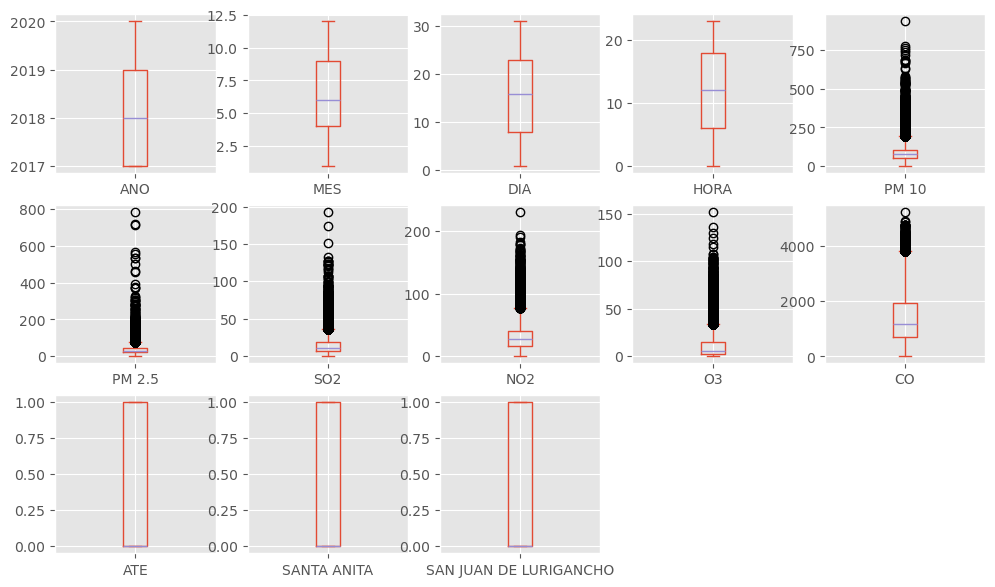

In [102]:
# Mostramos boxplots de los features
import matplotlib.pyplot as plt
df_imputed.plot(kind='box', subplots=True, layout=(3,5), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

CALCULO DEL AQI

In [103]:

# Cargar el dataset (adaptar si tu archivo tiene otro formato)
data = df_imputed
# Ejemplo de tablas de rangos AQI (personalizar según normativa local o EPA)
aqi_breakpoints = {
    "PM 10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200)],
    "PM 2.5": [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200)],
    "SO2": [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200)],
    "NO2": [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200)],
    "O3": [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200)],
    "CO": [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200)],
}

# Función para calcular AQI por contaminante
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (concentration - bp[0]) + bp[2]
    return np.nan  # Si está fuera de rango

# Calcular AQI para cada contaminante
for pollutant, breakpoints in aqi_breakpoints.items():
    data[f"AQI_{pollutant}"] = data[pollutant].apply(lambda x: calculate_aqi(x, breakpoints) if not pd.isna(x) else np.nan)

# Calcular el AQI final como el valor máximo
data["AQI"] = data[[f"AQI_{pollutant}" for pollutant in aqi_breakpoints.keys()]].max(axis=1)

df_imputed = data

In [104]:
df_imputed

,ANO,MES,DIA,HORA,PM 10,PM 2.5,SO2,NO2,O3,CO,ATE,SANTA ANITA,SAN JUAN DE LURIGANCHO,AQI_PM 10,AQI_PM 2.5,AQI_SO2,AQI_NO2,AQI_O3,AQI_CO,AQI
0,2017.0,1.0,1.0,0.0,421.9000,255.830,54.700,37.015,1.9,885.5,1.0,0.0,0.0,NaN,NaN,74.494872,34.919811,1.759259,NaN,74.494872
1,2017.0,1.0,1.0,1.0,382.9000,270.650,53.500,38.380,1.7,1046.5,1.0,0.0,0.0,NaN,NaN,72.987179,36.207547,1.574074,NaN,72.987179
2,2017.0,1.0,1.0,2.0,403.4000,280.360,54.200,46.520,2.1,1342.0,1.0,0.0,0.0,NaN,NaN,73.866667,43.886792,1.944444,NaN,73.866667
3,2017.0,1.0,1.0,3.0,425.0000,285.555,52.000,44.640,2.4,1431.8,1.0,0.0,0.0,NaN,NaN,71.102564,42.113208,2.222222,NaN,71.102564
4,2017.0,1.0,1.0,4.0,289.3000,171.070,47.900,36.545,1.4,1138.5,1.0,0.0,0.0,167.976768,NaN,65.951282,34.476415,1.296296,NaN,167.976768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76734,2020.0,9.0,30.0,19.0,31.9780,15.030,23.670,23.450,3.5,1007.4,0.0,0.0,1.0,29.609259,57.161803,33.814286,22.122642,3.240741,NaN,57.161803
76735,2020.0,9.0,30.0,20.0,20.8800,13.330,23.465,22.145,3.6,962.5,0.0,0.0,1.0,19.333333,53.586695,33.521429,20.891509,3.333333,NaN,53.586695
76736,2020.0,9.0,30.0,21.0,54.5810,20.490,23.065,11.200,3.5,869.4,0.0,0.0,1.0,NaN,68.644206,32.950000,10.566038,3.240741,NaN,68.644206
76737,2020.0,9.0,30.0,22.0,59.7975,24.550,23.425,22.695,3.7,861.3,0.0,0.0,1.0,53.374520,77.182403,33.464286,21.410377,3.425926,NaN,77.182403


DATA ANALYSIS

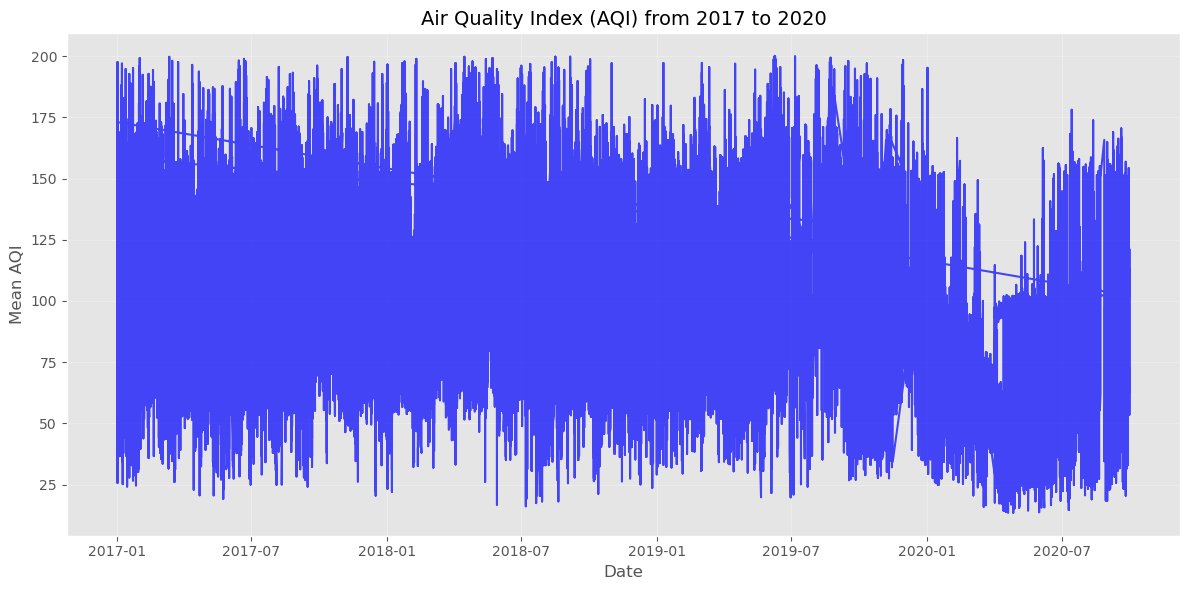

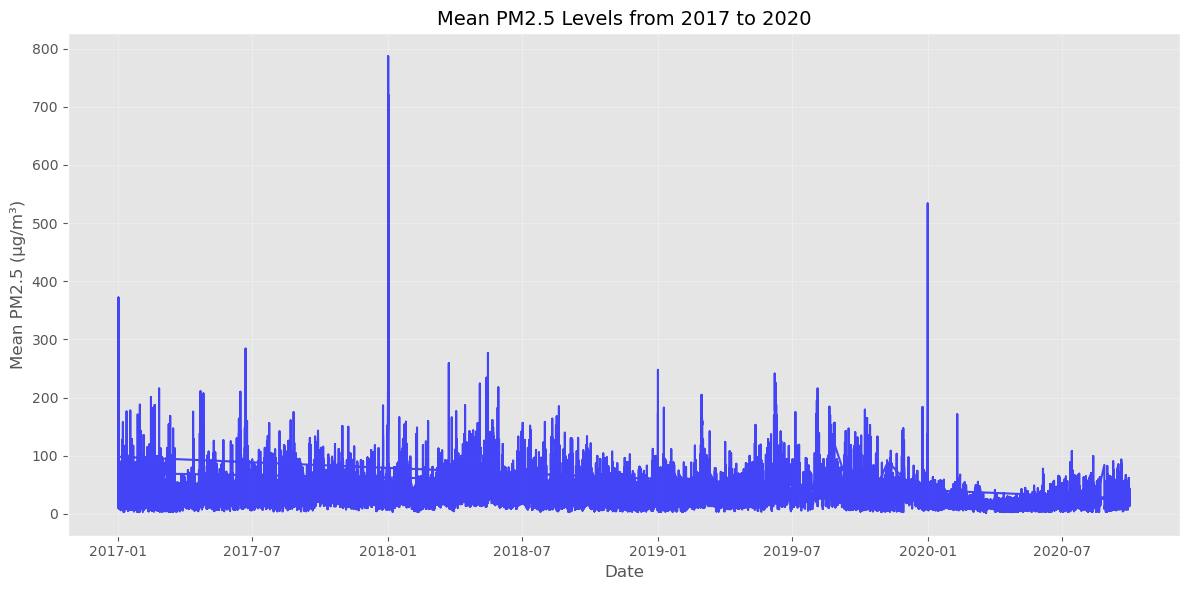

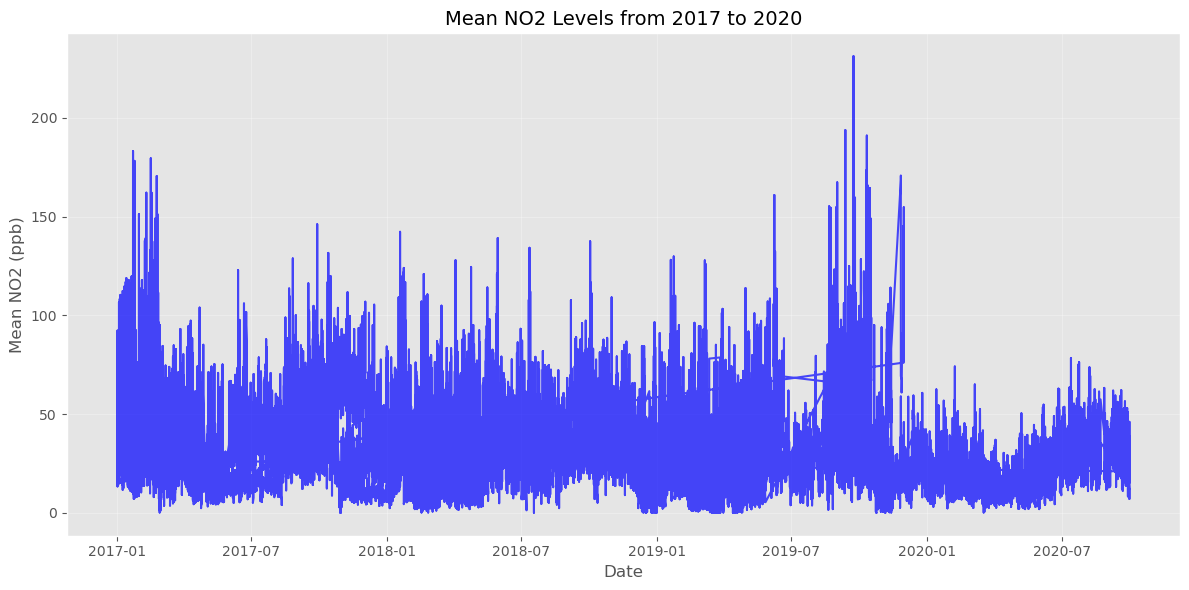

In [105]:
data = df_imputed  # Reemplaza con el nombre real del archivo si es un CSV

data["ANO"] = data["ANO"].astype(int)
data["MES"] = data["MES"].astype(int)
data["DIA"] = data["DIA"].astype(int)
# Crear la columna de fecha
data["Fecha"] = pd.to_datetime(data.rename(columns={"ANO": "year", "MES": "month", "DIA": "day"})[["year", "month", "day"]])


# Configurar el estilo de los gráficos
plt.style.use("ggplot")

# Gráfico (a): AQI
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["AQI"], label="Mean AQI", color="blue", alpha=0.7)
plt.title("Air Quality Index (AQI) from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean AQI", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico (b): PM2.5
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["PM 2.5"], label="Mean PM2.5", color="blue", alpha=0.7)
plt.title("Mean PM2.5 Levels from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean PM2.5 (µg/m³)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico (c): NO2
plt.figure(figsize=(12, 6))
plt.plot(data["Fecha"], data["NO2"], label="Mean NO2", color="blue", alpha=0.7)
plt.title("Mean NO2 Levels from 2017 to 2020", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean NO2 (ppb)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

CORRELACION

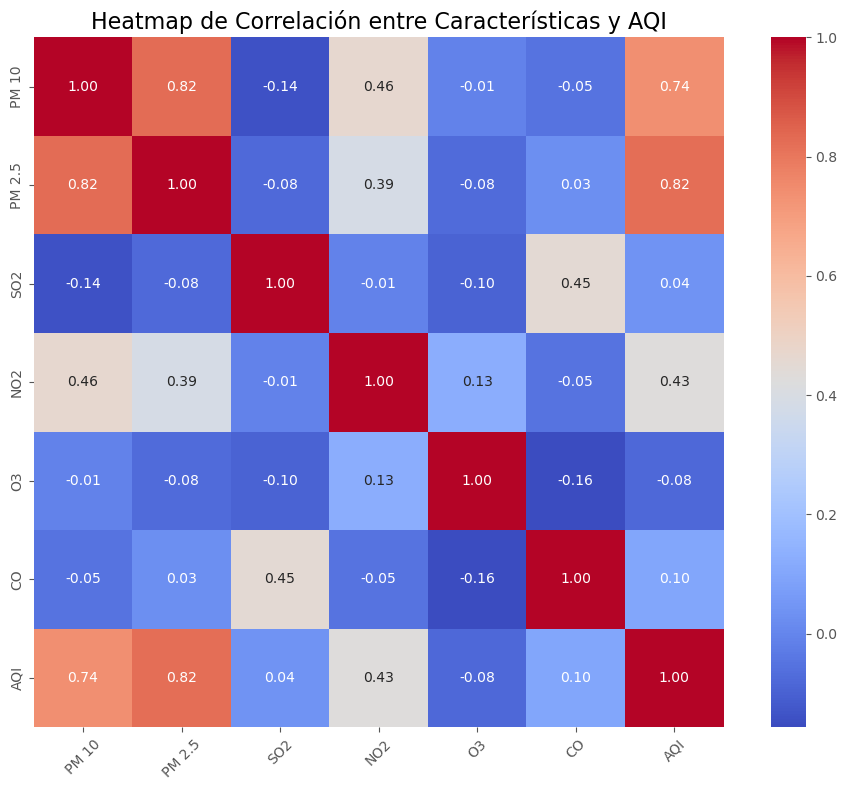

In [106]:
import seaborn as sns

features = ["PM 10", "PM 2.5", "SO2", "NO2", "O3", "CO", "AQI"]

# Cálculo de la matriz de correlación
correlation_matrix = data[features].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap de Correlación entre Características y AQI", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Asegúrate de que no haya columnas innecesarias como 'Fecha'
if "Fecha" in data.columns:
    data = data.drop(columns=["Fecha"])  # Eliminar columna 'Fecha' si existe

# Lista de variables de contaminación
pollution_vars = ["CO", "PM 10", "PM 2.5", "SO2", "NO2", "O3"]

# Modelos a utilizar
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(eval_metric="rmse", use_label_encoder=False)  # Parámetro para evitar advertencias
}

# Crear un DataFrame para guardar resultados
overall_results = pd.DataFrame()

# Entrenamiento para cada variable de contaminación
for var in pollution_vars:
    print(f"\nEvaluando la variable objetivo: {var}")
    
    # Definir características (X) y variable objetivo (y)
    X = data.drop(columns=[var])  # Todas las columnas excepto la actual variable de contaminación
    y = data[var]  # La variable actual como objetivo

    # Dividir datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Guardar los resultados para esta variable
    results = []

    for model_name, model in models.items():
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predicciones
        y_pred = model.predict(X_test)
        
        # Calcular métricas
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Guardar resultados
        results.append({"Model": model_name, "MAE": mae, "MSE": mse, "R2": r2})
    
    # Convertir resultados de esta variable en DataFrame
    var_results = pd.DataFrame(results)
    var_results["Target"] = var  # Agregar nombre de la variable objetivo
    overall_results = pd.concat([overall_results, var_results], ignore_index=True)

# Mostrar resultados generales
print("\nResultados Generales:")
print(overall_results)


Evaluando la variable objetivo: CO


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluando la variable objetivo: PM 10


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluando la variable objetivo: PM 2.5


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluando la variable objetivo: SO2


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluando la variable objetivo: NO2


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:06:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluando la variable objetivo: O3


d:\Anaconda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:07:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Resultados Generales:
            Model         MAE           MSE        R2  Target
0   Decision Tree  130.231531  45669.606543  0.949967      CO
1   Random Forest   94.914457  23053.206332  0.974744      CO
2         XGBoost  136.945964  38187.488956  0.958164      CO
3   Decision Tree    0.411469     68.863824  0.972834   PM 10
4   Random Forest    0.312102     34.635795  0.986337   PM 10
5         XGBoost    0.650191     33.189739  0.986907   PM 10
6   Decision Tree    0.098622     17.520856  0.959578  PM 2.5
7   Random Forest    0.090198     13.118835  0.969734  PM 2.5
8         XGBoost    0.255582     26.407208  0.939077  PM 2.5
9   Decision Tree    0.023044      0.681139  0.997894     SO2
10  Random Forest    0.018566      0.171405  0.999470     SO2
11        XGBoost    0.100253      0.332976  0.998971     SO2
12  Decision Tree    0.029521      1.167030  0.996794     NO2
13  Random Forest    0.031649      0.886153  0.997566     NO2
14        XGBoost    0.179684      1.727881  0.

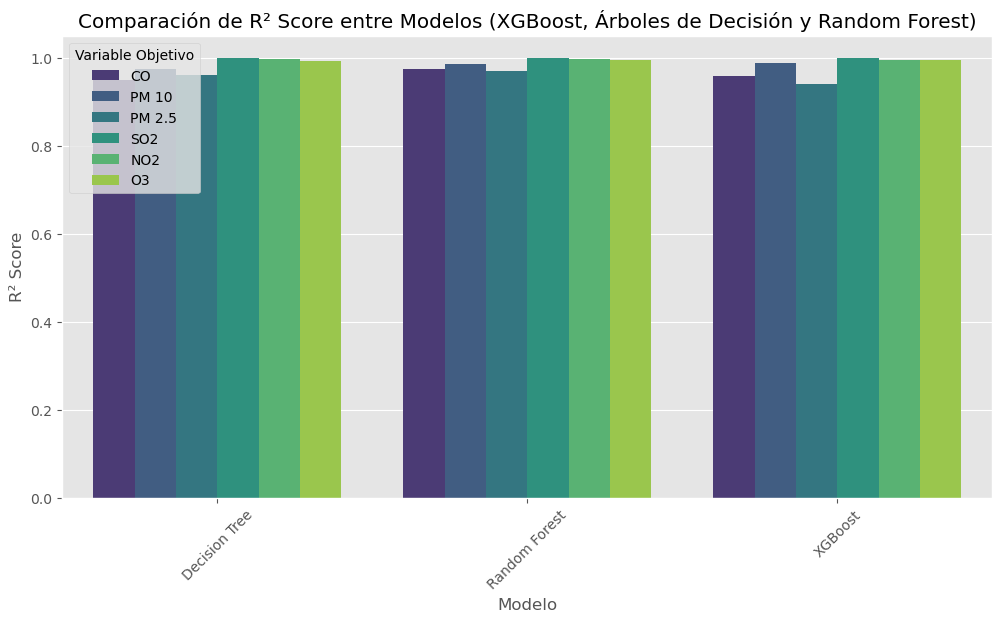

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que el DataFrame 'overall_results' contiene los resultados generales
# Visualización de la métrica R2
plt.figure(figsize=(12, 6))
sns.barplot(data=overall_results, x="Model", y="R2", hue="Target", palette="viridis")
plt.title("Comparación de R² Score entre Modelos (XGBoost, Árboles de Decisión y Random Forest)")
plt.ylabel("R² Score")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo', loc='upper left')
plt.show()



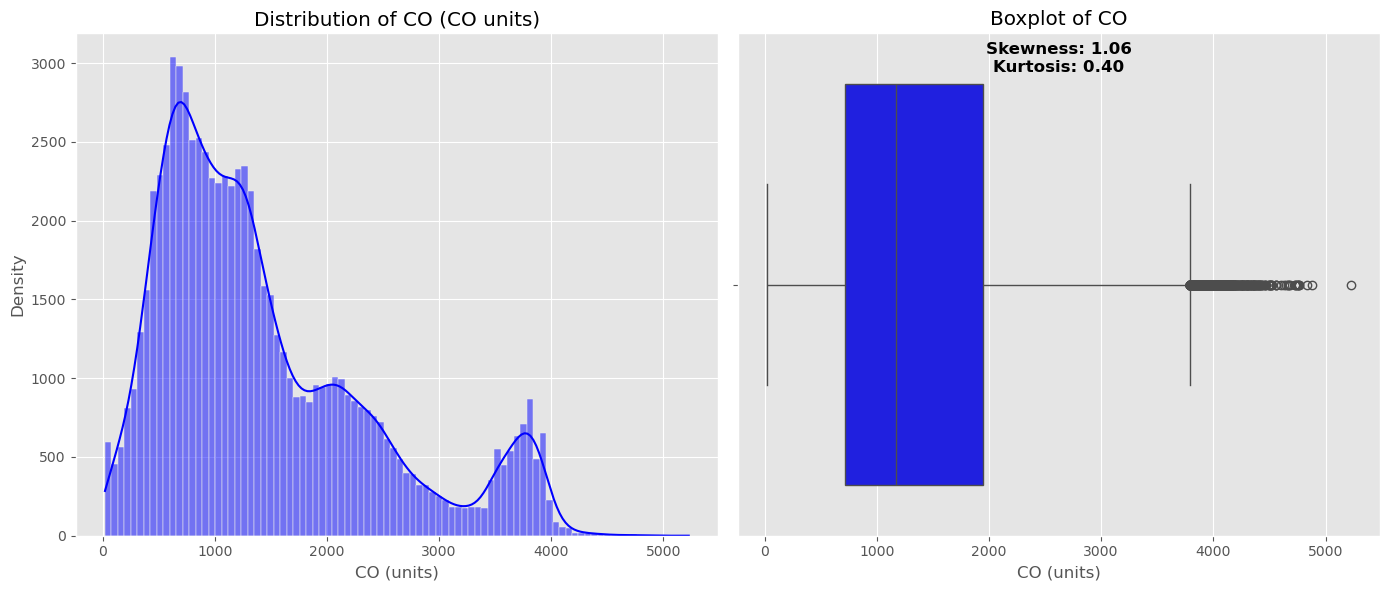

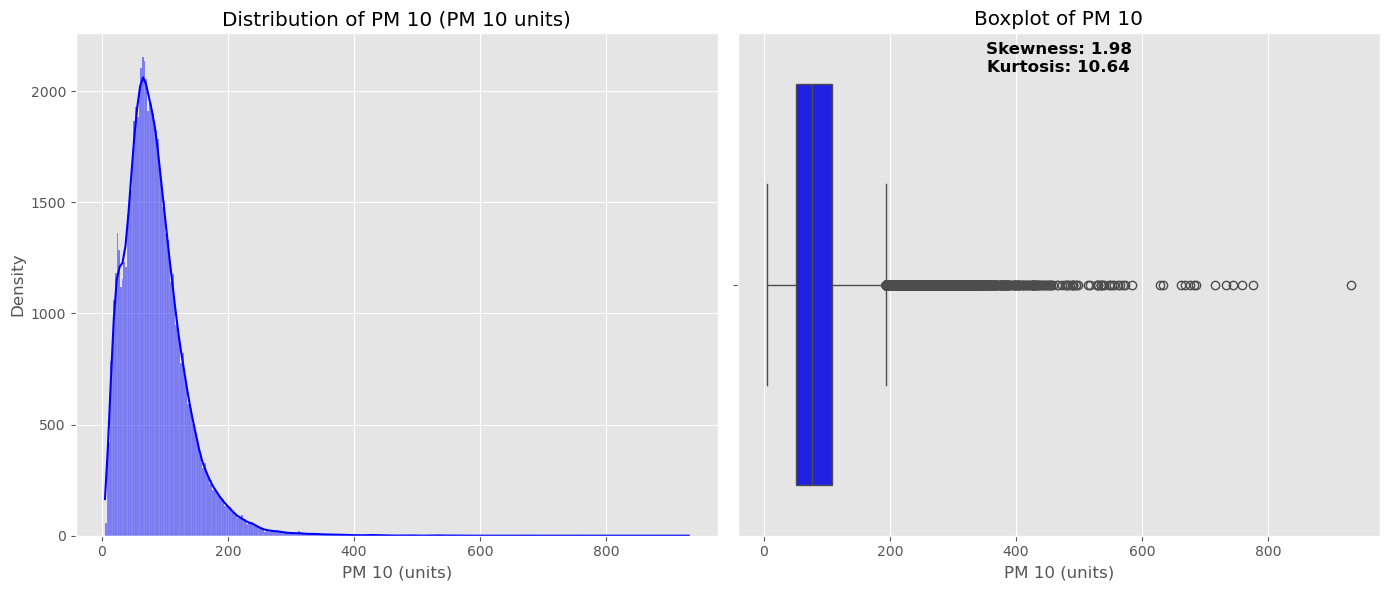

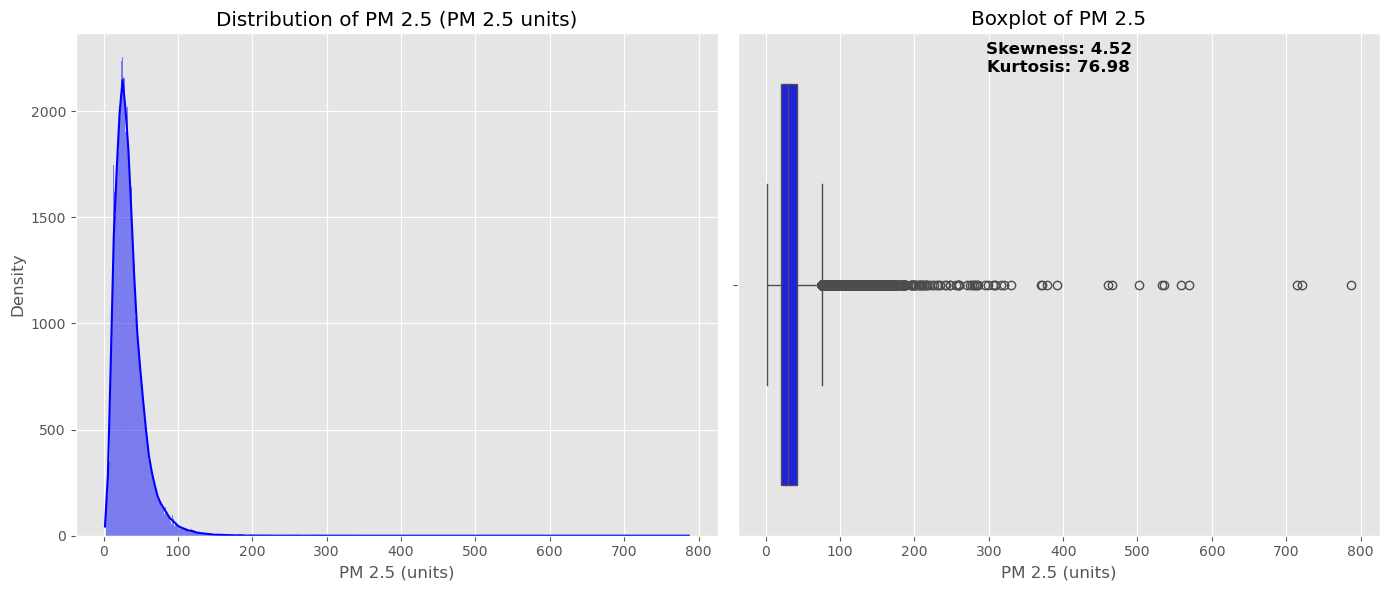

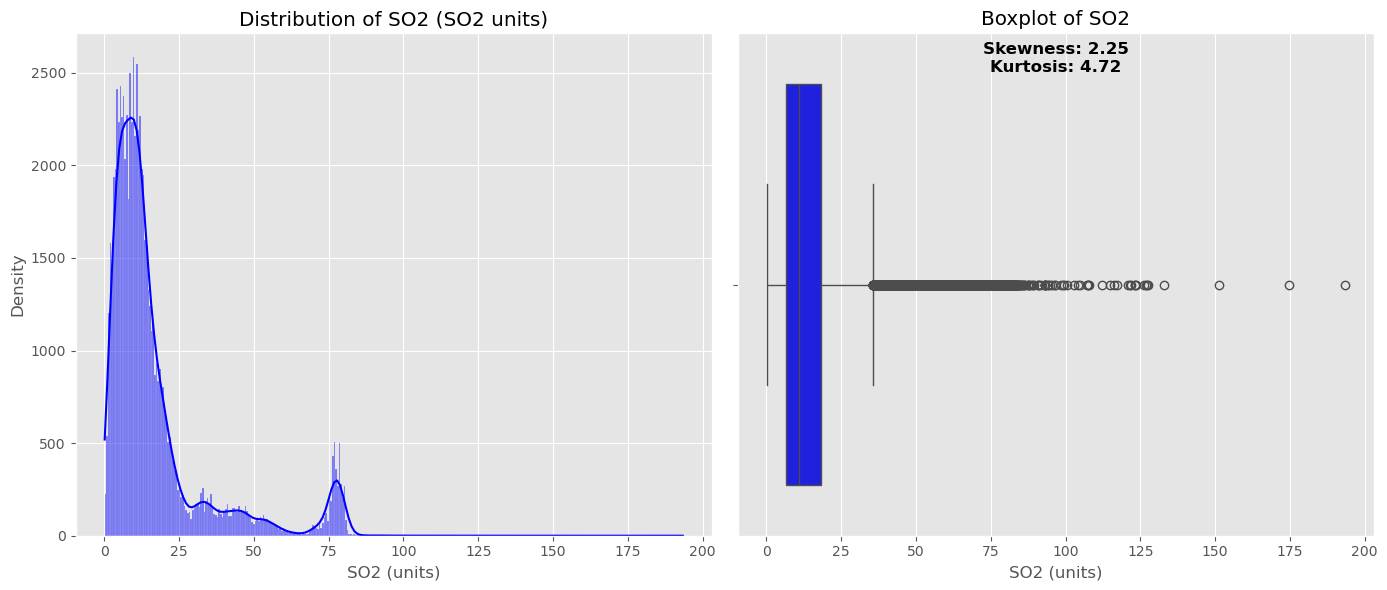

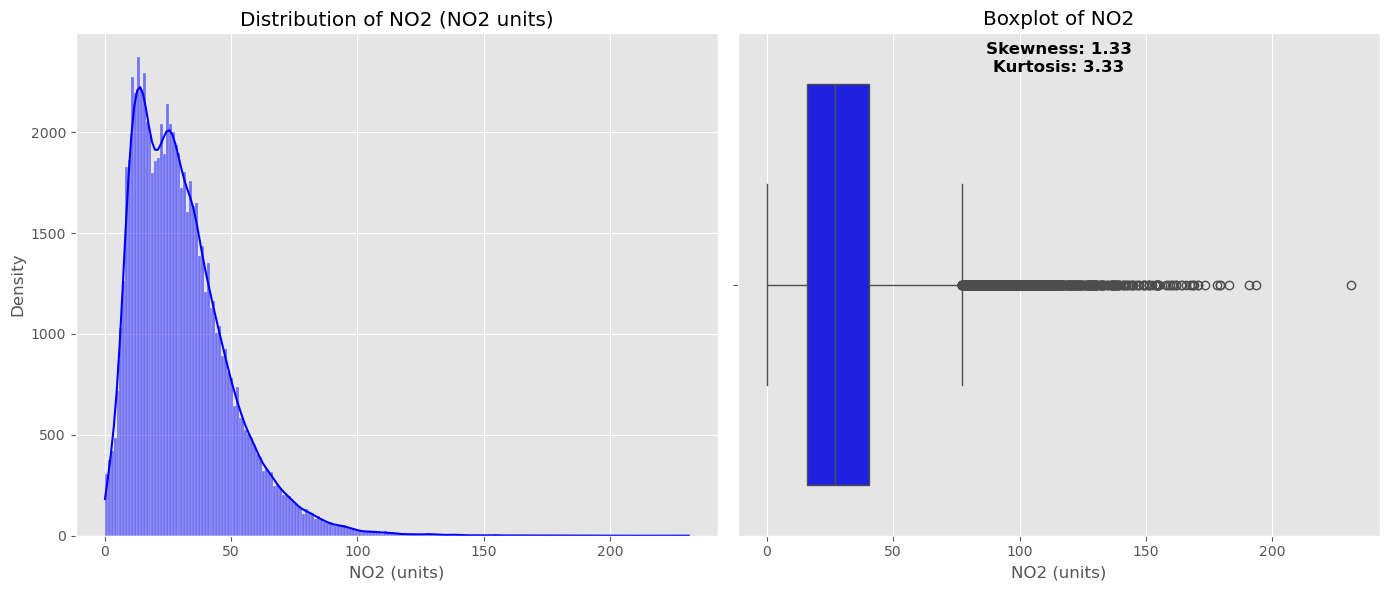

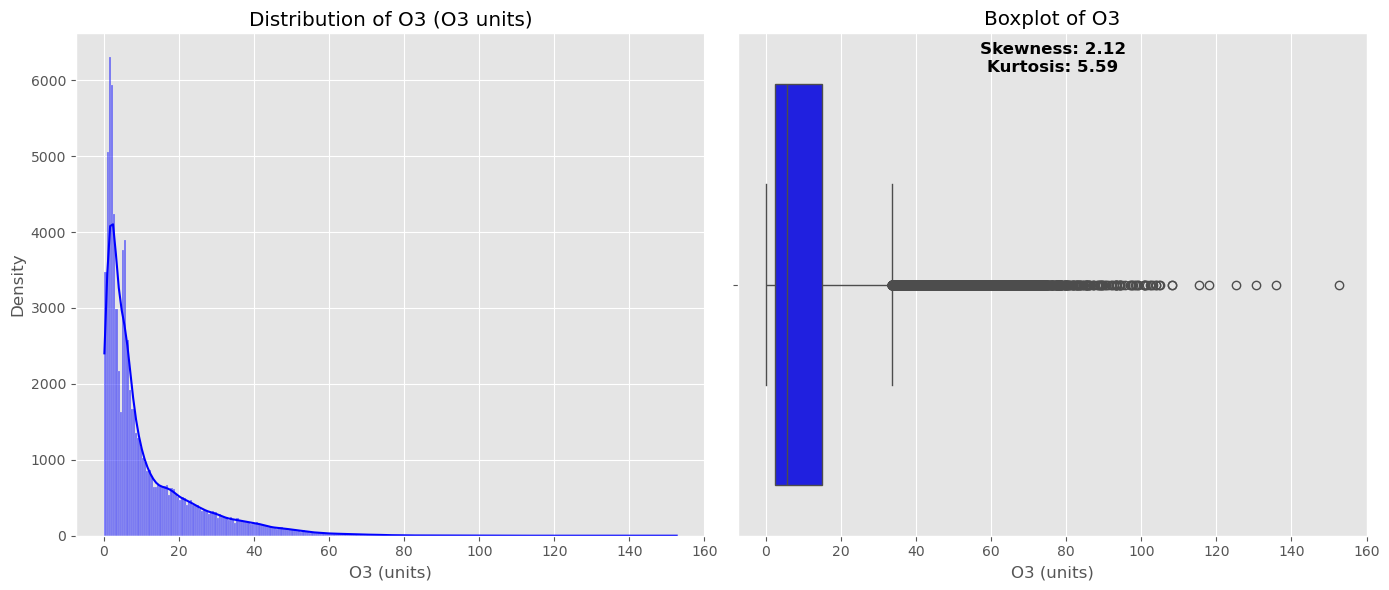

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista de las variables de contaminación
pollution_vars = ["CO", "PM 10", "PM 2.5", "SO2", "NO2", "O3"]

# Crear los gráficos para cada variable
for var in pollution_vars:
    # Extraer la variable de contaminación
    data_var = data[var]
    
    # Calcular skewness y kurtosis
    skewness = stats.skew(data_var)
    kurtosis = stats.kurtosis(data_var)
    
    # Crear figura y ejes para los gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Graficar la distribución
    sns.histplot(data_var, kde=True, ax=axes[0],color="blue")
    axes[0].set_title(f"Distribution of {var} ({var} units)")
    axes[0].set_xlabel(f"{var} (units)")
    axes[0].set_ylabel("Density")
    
    # Graficar el boxplot
    sns.boxplot(x=data_var, ax=axes[1],color="blue")
    axes[1].set_title(f"Boxplot of {var}")
    axes[1].set_xlabel(f"{var} (units)")
    
    # Agregar skewness y kurtosis al boxplot
    axes[1].annotate(f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",
                     xy=(0.5, 0.95), xycoords='axes fraction',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=12, color='black', weight='bold')
    
    plt.tight_layout()
    plt.show()
